In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#load the dataset
df=pd.read_csv('/content/train.csv')

#Data Cleaning
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop('Cabin', axis=1, inplace=True)

#encode categorical variables
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)


/tmp/ipython-input-2-3670511687.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-2-3670511687.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)',

In [3]:
#Summary Statistics
print(df.describe())

       PassengerId    Survived      Pclass         Sex         Age  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642    0.352413   29.361582   
std     257.353842    0.486592    0.836071    0.477990   13.019697   
min       1.000000    0.000000    1.000000    0.000000    0.420000   
25%     223.500000    0.000000    2.000000    0.000000   22.000000   
50%     446.000000    0.000000    3.000000    0.000000   28.000000   
75%     668.500000    1.000000    3.000000    1.000000   35.000000   
max     891.000000    1.000000    3.000000    1.000000   80.000000   

            SibSp       Parch        Fare  
count  891.000000  891.000000  891.000000  
mean     0.523008    0.381594   32.204208  
std      1.102743    0.806057   49.693429  
min      0.000000    0.000000    0.000000  
25%      0.000000    0.000000    7.910400  
50%      0.000000    0.000000   14.454200  
75%      1.000000    0.000000   31.000000  
max      8.000000

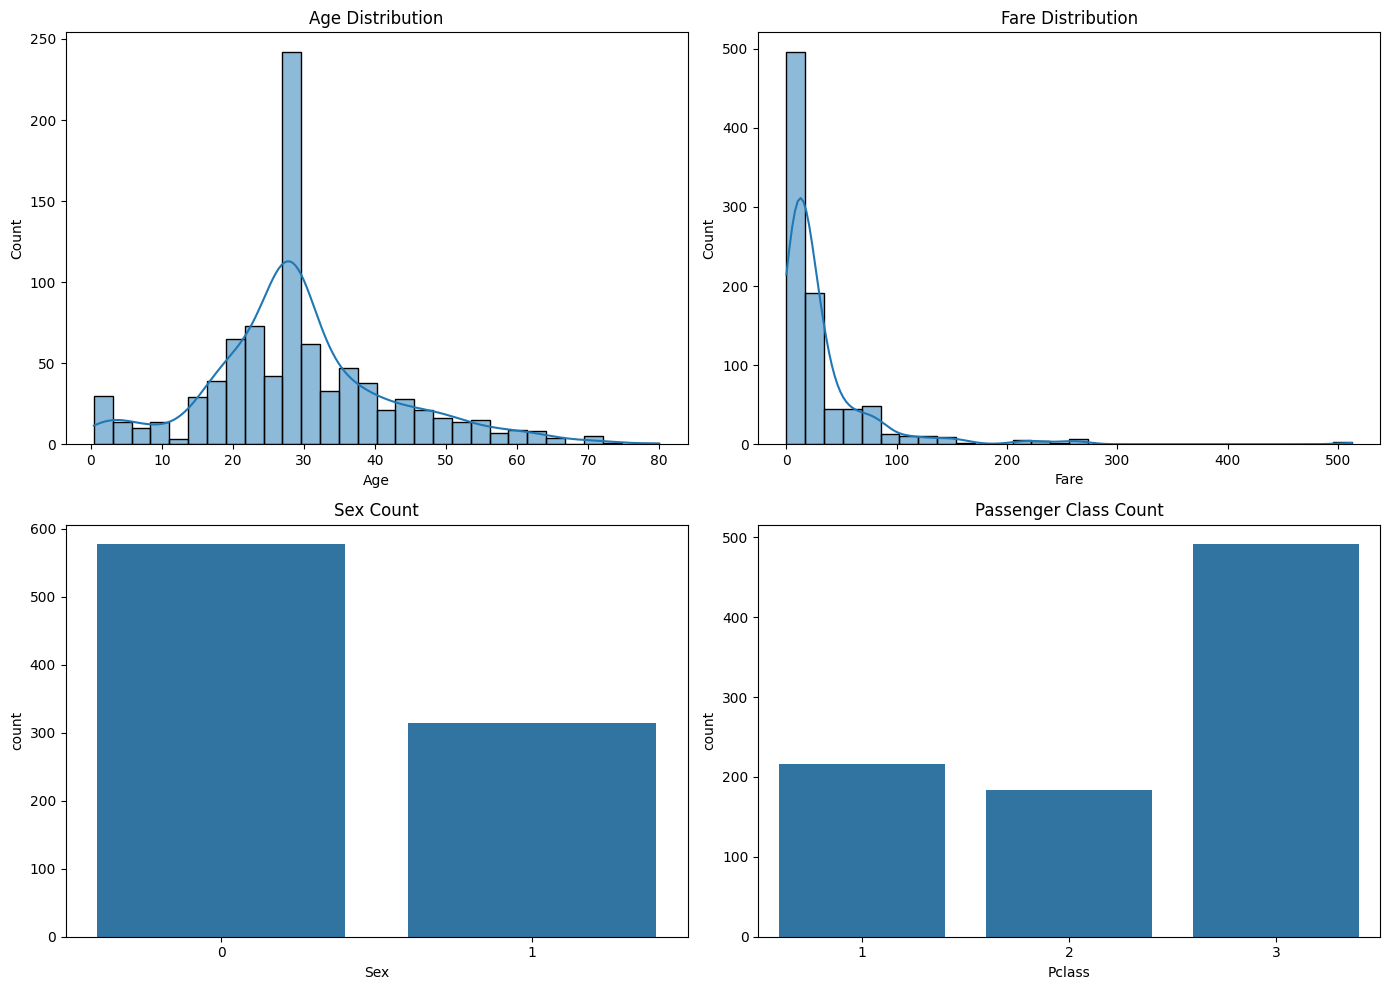

In [10]:
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

sns.histplot(df['Age'], bins=30, kde=True, ax=axs[0, 0])
axs[0, 0].set_title('Age Distribution')

sns.histplot(df['Fare'], bins=30, kde=True, ax=axs[0, 1])
axs[0, 1].set_title('Fare Distribution')

sns.countplot(x='Sex', data=df, ax=axs[1, 0])
axs[1, 0].set_title('Sex Count')

sns.countplot(x='Pclass', data=df, ax=axs[1, 1])
axs[1, 1].set_title('Passenger Class Count')

plt.tight_layout()
plt.show()

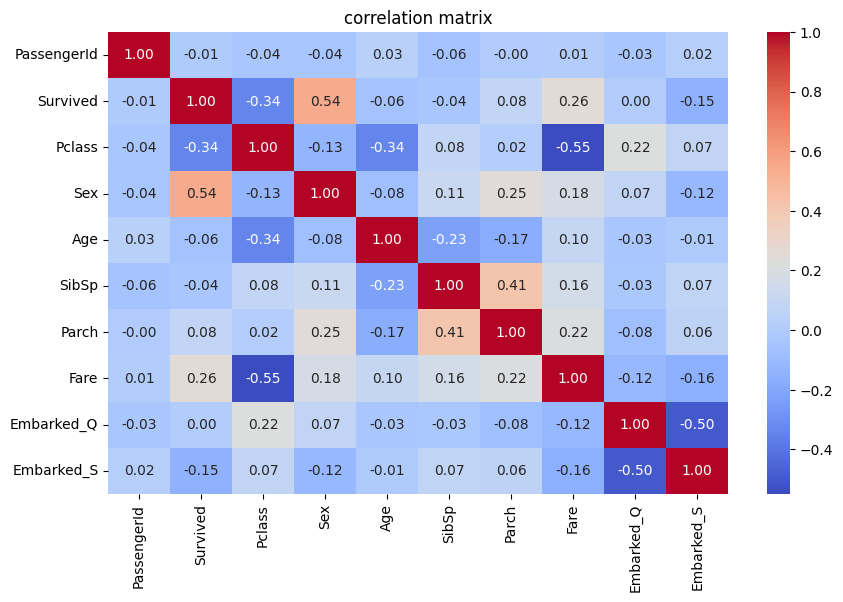

In [11]:
# correlation heatmap
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True),annot=True ,cmap='coolwarm',fmt=".2f")
plt.title("correlation matrix")
plt.show()

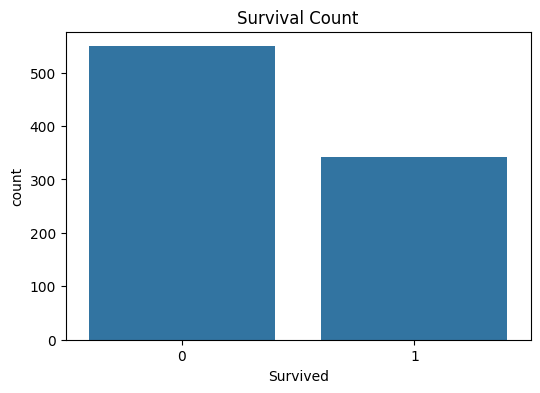

In [15]:
# Survival count
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=df)
plt.title('Survival Count')
plt.show()

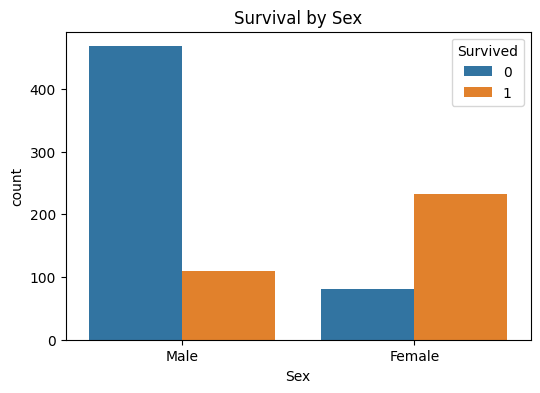

In [12]:
# Survival by Sex
plt.figure(figsize=(6, 4))
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival by Sex')
plt.xticks([0, 1], ['Male', 'Female'])
plt.show()

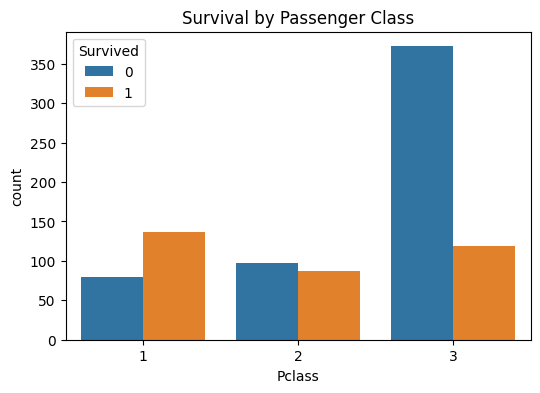

In [13]:
# Survival by Pclass
plt.figure(figsize=(6, 4))
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival by Passenger Class')
plt.show()

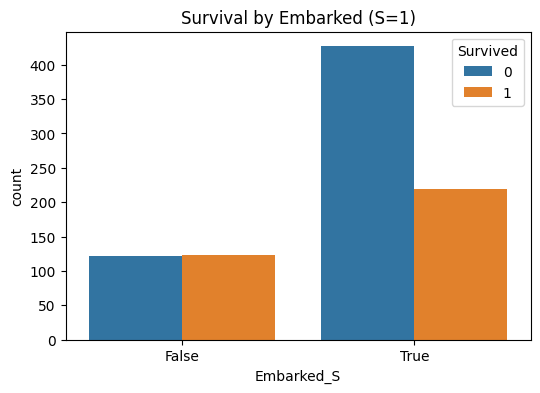

In [14]:
# Survival by Embarked
plt.figure(figsize=(6, 4))
sns.countplot(x='Embarked_S', hue='Survived', data=df)
plt.title('Survival by Embarked (S=1)')
plt.show()

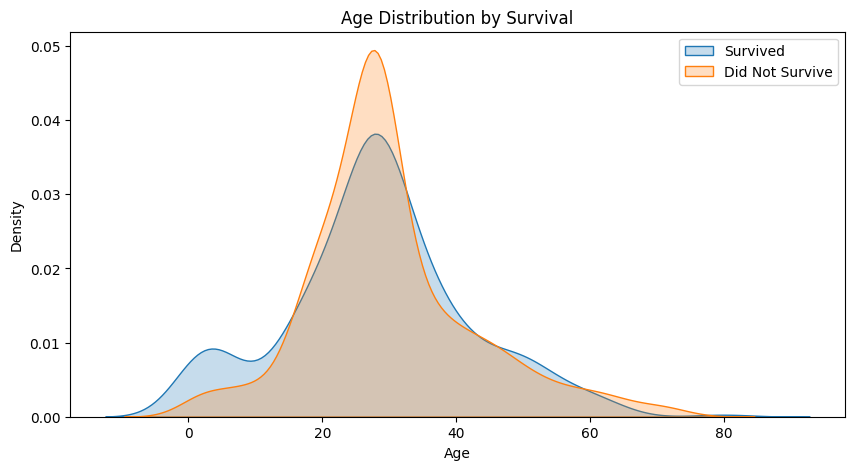

In [9]:
# KDE Plot of Age Distribution by Survival
plt.figure(figsize=(10, 5))
sns.kdeplot(df[df['Survived'] == 1]['Age'], label='Survived', fill=True)
sns.kdeplot(df[df['Survived'] == 0]['Age'], label='Did Not Survive', fill=True)
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.legend()
plt.show()